# COVID-19 Visualization - Indonesia vs Countries with Most Cases
Using dataset from this <a href="https://github.com/datasets/covid-19/blob/main/data/countries-aggregated.csv" >COVID-19 Github repository</a>,
I will be exploring the data to compare the spread of the virus in Indonesia with top five countries with most cases as of 5 February 2021:<br>
<ul>
<li>US</li>
<li>India</li>
<li>Brazil</li>
<li>Russia</li>
<li>Italy</li>
</ul>
I am using source code from <a href ="https://datagy.io/">Nik Piepenbreier</a> as seen in this <a href="https://towardsdatascience.com/visualizing-covid-19-data-beautifully-in-python-in-5-minutes-or-less-affc361b2c6a">article</a> he wrote on Medium.<br>

###### Loading Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

###### Loading and selecting data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['US', 'India', 'Brazil', 'Russia', 'Indonesia', 'Italy']
df = df[df['Country'].isin(countries)]

###### Creating summary column

In [3]:
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
print(df)

            Date Country  Confirmed  Recovered  Deaths     Cases
8786  2020-01-22  Brazil          0          0       0         0
8787  2020-01-23  Brazil          0          0       0         0
8788  2020-01-24  Brazil          0          0       0         0
8789  2020-01-25  Brazil          0          0       0         0
8790  2020-01-26  Brazil          0          0       0         0
...          ...     ...        ...        ...     ...       ...
68373 2021-02-02      US   26435557          0  446885  26882442
68374 2021-02-03      US   26557026          0  450797  27007823
68375 2021-02-04      US   26680214          0  455881  27136095
68376 2021-02-05      US   26813772          0  459555  27273327
68377 2021-02-06      US   26916192          0  462173  27378365

[2292 rows x 6 columns]


###### Restructuring data

In [4]:
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries
print(df)

Country       Brazil     India  Indonesia    Italy   Russia        US
Date                                                                 
2020-01-22         0         0          0        0        0         1
2020-01-23         0         0          0        0        0         1
2020-01-24         0         0          0        0        0         2
2020-01-25         0         0          0        0        0         2
2020-01-26         0         0          0        0        0         5
...              ...       ...        ...      ...      ...       ...
2021-02-02  17767801  21394511    2026798  4703451  7219438  26882442
2021-02-03  17878864  21425341    2048106  4732858  7260560  27007823
2021-02-04  17991285  21453722    2071412  4764615  7301555  27136095
2021-02-05  18073347  21480018    2093036  4794200  7341793  27273327
2021-02-06  18106191  21503960    2117587  4823162  7381208  27378365

[382 rows x 6 columns]


###### Calculating Rates per 100,000

In [5]:
populations = {'US': 332915073, 'India': 1393409038, 'Brazil': 213993437, 'Russia': 145912025, 'Indonesia': 276361783, 'Italy':60367477}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000
print(percapita)

                 Brazil        India   Indonesia        Italy       Russia  \
Date                                                                         
2020-01-22     0.000000     0.000000    0.000000     0.000000     0.000000   
2020-01-23     0.000000     0.000000    0.000000     0.000000     0.000000   
2020-01-24     0.000000     0.000000    0.000000     0.000000     0.000000   
2020-01-25     0.000000     0.000000    0.000000     0.000000     0.000000   
2020-01-26     0.000000     0.000000    0.000000     0.000000     0.000000   
...                 ...          ...         ...          ...          ...   
2021-02-02  8302.965385  1535.407796  733.385774  7791.365871  4947.801938   
2021-02-03  8354.865575  1537.620355  741.095957  7840.079187  4975.984673   
2021-02-04  8407.400363  1539.657158  749.529105  7892.685328  5004.080370   
2021-02-05  8445.748268  1541.544329  757.353632  7941.693505  5031.657261   
2021-02-06  8461.096403  1543.262561  766.237277  7989.669669  5

###### Creating visualization

Text(2020-01-23 00:00:00, -1000000, 'Dhanny W.I.                      Source: Github Covid Dataset')

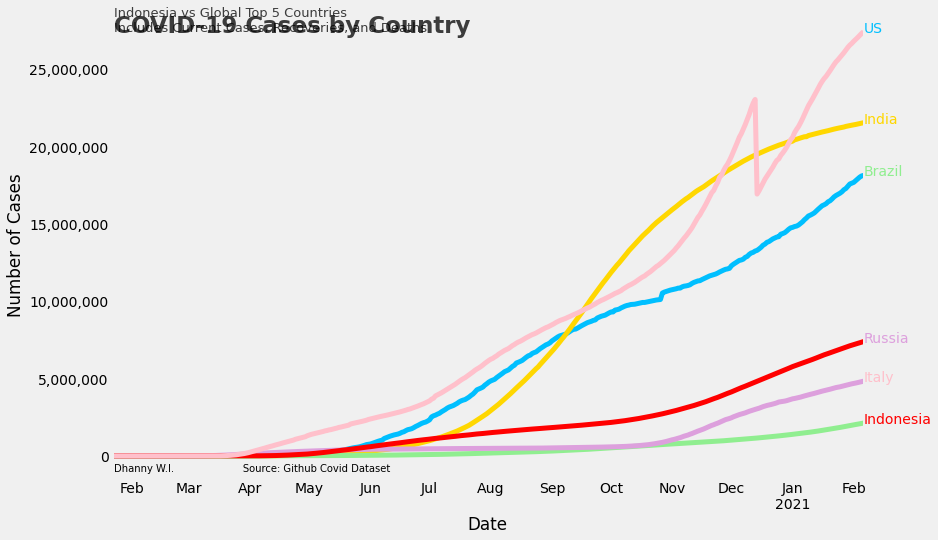

In [6]:
# Generating Colours and Style
colors = {'US':'deepskyblue', 'India':'gold', 'Brazil':'lightgreen', 'Russia':'plum', 'Indonesia':'red', 'Italy':'pink'}
plt.style.use('fivethirtyeight')

# Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('Number of Cases')

# Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country)

# Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+5000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+35000, s = "Indonesia vs Global Top 5 Countries\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 13, alpha = .75)
plot.text(x = percapita.index[1], y = -1000000,s = 'Dhanny W.I.                      Source: Github Covid Dataset', fontsize = 10)

Text(2020-01-23 00:00:00, -335, 'Dhanny W.I.                      Source: Github Covid Dataset')

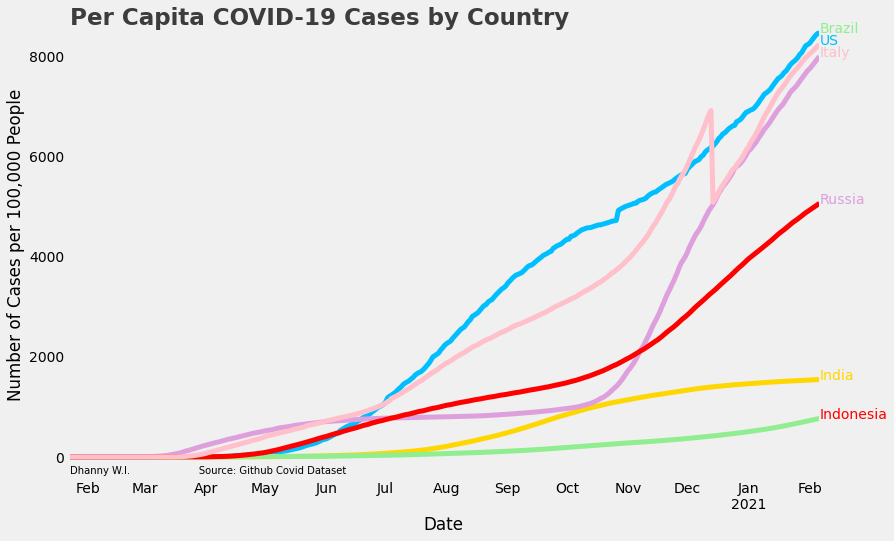

In [7]:
percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('Number of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+155, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "Indonesia vs Global Top 5 Countries\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 13, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -335,s = 'Dhanny W.I.                      Source: Github Covid Dataset', fontsize = 10)